In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
df= pd.read_csv("E:\FWI\myenv\FWI Dataset.csv")


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [4]:
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia


In [5]:
df.tail(3)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [ ]:
# Data types
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


In [ ]:
#step 1: Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [10]:
df.columns = df.columns.str.strip()
df["Classes"] = df["Classes"].fillna(df["Classes"].mode()[0])

In [11]:
print("Missing values in each column after filling 'Classes':")
df.isnull().sum()

Missing values in each column after filling 'Classes':


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
print("Number of duplicate rows in the dataset:")
df.duplicated().sum()

Number of duplicate rows in the dataset:


np.int64(0)

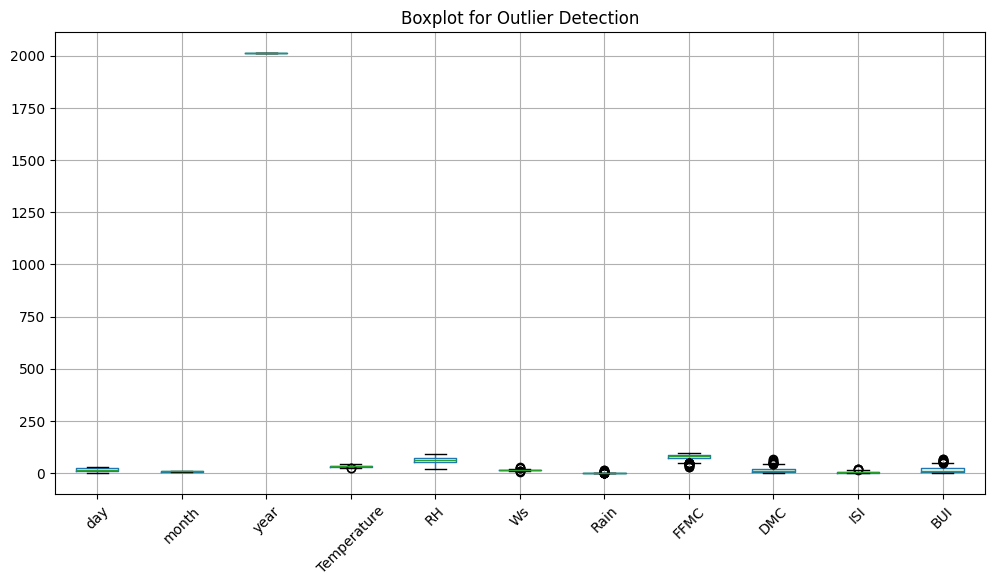

In [ ]:
#step 2: Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [34]:
#statistical threshold
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check number of outliers in each numerical column
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Column: {col} → Number of outliers: {len(outliers)}")

Column: day → Number of outliers: 0
Column: month → Number of outliers: 0
Column: year → Number of outliers: 0
Column: Temperature → Number of outliers: 2
Column: RH → Number of outliers: 0
Column: Ws → Number of outliers: 8
Column: Rain → Number of outliers: 35
Column: FFMC → Number of outliers: 16
Column: DMC → Number of outliers: 12
Column: ISI → Number of outliers: 4
Column: BUI → Number of outliers: 12


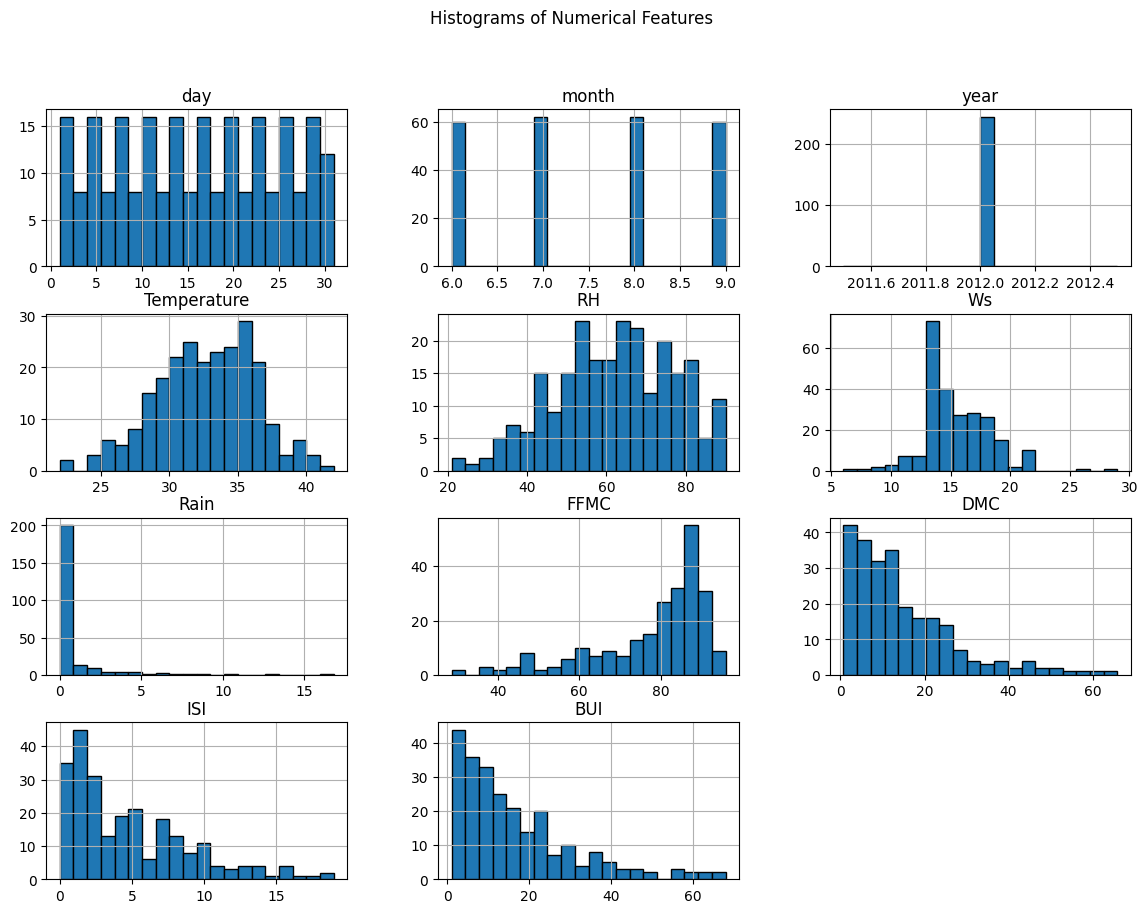

In [35]:
#step 3: Visualizations
#Histograms
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


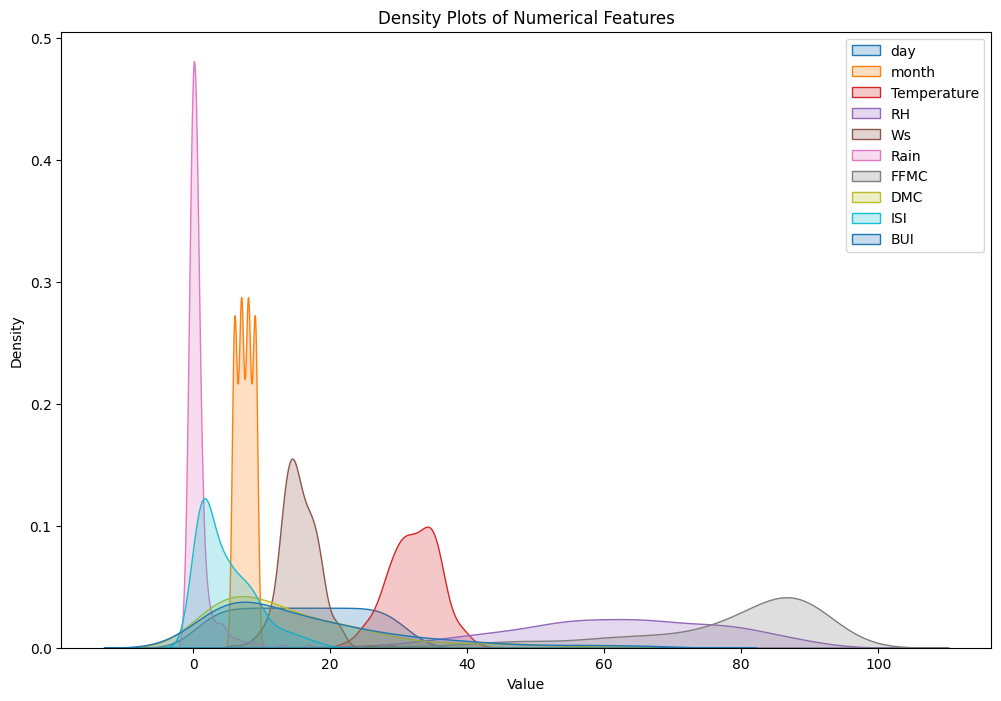

In [36]:
# Density Plots
plt.figure(figsize=(12, 8))

for col in num_cols:
    sns.kdeplot(df[col], label=col, fill=True)

plt.title("Density Plots of Numerical Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

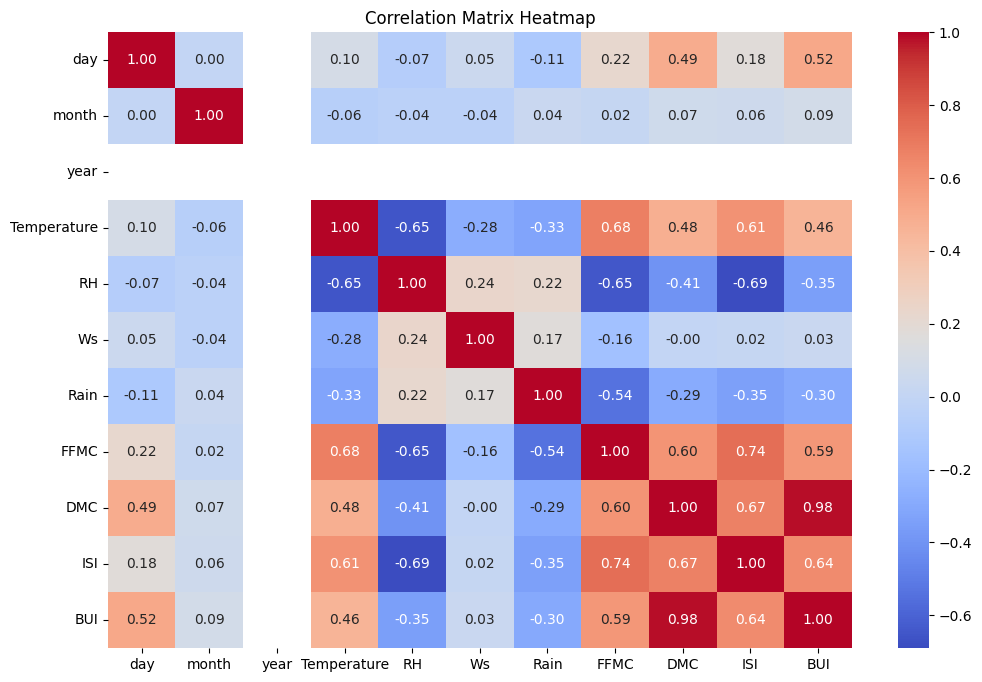

In [62]:
#step 4: Correlation Matrix 
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

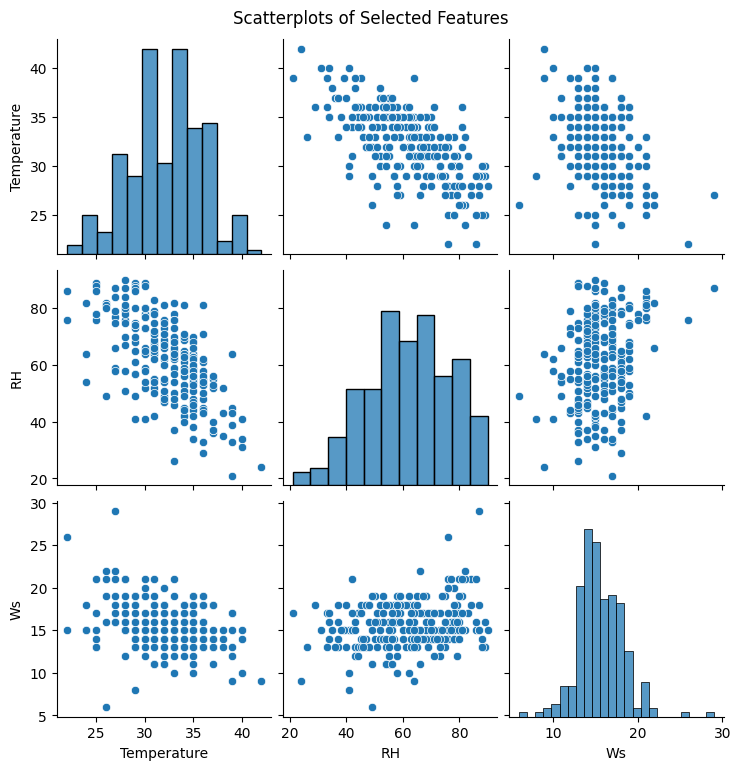

In [ ]:
# Scatterplots of Selected Features
selected_cols = ["Temperature", "RH", "Ws"]  # Replace with desired columns
if all(col in df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols].dropna())
    plt.suptitle("Scatterplots of Selected Features", y=1.02)
    plt.show()
else:
    print("Some selected columns not found in the dataset.")

In [64]:
#step 5: Encoding Categorical Variables
df.columns = df.columns.str.strip()

print("Unique values in Region:", df['Region'].unique())
le = LabelEncoder()

df['Region_encoded'] = le.fit_transform(df['Region'])
df[['Region', 'Region_encoded']].head()

Unique values in Region: ['Bejaia' 'Sidi-Bel Abbes']


,Region,Region_encoded
0,Bejaia,0
1,Bejaia,0
2,Bejaia,0
3,Bejaia,0
4,Bejaia,0


In [ ]:
#Mapping of regions
print("\nRegion Mapping:")
region_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)


Region Mapping:
{'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}
Region              object
Region_encoded    category
dtype: object


In [53]:
#step 6:saved the cleaned dataset
df.to_csv("E:/FWI/myenv/FWI_Cleaned_Dataset.csv", index=False)
print("Cleaned dataset saved as FWI_Cleaned_Dataset.csv")


Cleaned dataset saved as FWI_Cleaned_Dataset.csv
